<style type="text/css">
.time_spent {
    width: 3em;
    border-style: none;
    background-color: silver;
    font-weight: bold;
    padding-left: 5px;
}
</style>

# [WS14/15] Mathematics for Robotics and Control: Assignment 004 - Matrix decomposition

First we will setup this notebook so that figures and plots can be shown in the notebook page.

In [10]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
except NameError:
    pass

import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot
            
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython
from pylab import *
from numpy import *

---

**Hint**: Before you start solving the assignment, you might want to check the following *numpy* functions:

```
numpy.linalg.svd
```

## Covariance matrix properties

Write a mathematically sound proof for each of the following properties of the covariance matrix:

1) That for a given matrix $X_{m\times n}$, where $n$ is the number of observations and $m$ is the number of variables, the expression


$$ \frac{(X - \bar{X})(X - \bar{X})^{T}}{n-1}  $$

Where :
- $\bar{X} $ are mean vector

yields the covariance matrix.

2) Under which conditions taking does the eigendecomposition of a matrix yield an orthonormal basis, and for which vector space.

3) When applying Principal Components Analysis, each eigenvector points into the direction of one the dataset's principal components and how much do the component contribute to the overall variance is related to each eigenvector's eigenvalue.


# Solution 
1) A covariance matrix is a matrix that shows relationship between the two data sets i.e. x and y. Since to compute covariance  matrix, each element of x and y should b subtracted from mean value and product of both x and y is divided by number of samples. Therefore, above equation is definition of covariance matrix. In covariance matrix, diagonal elements represents variance and off-diagonal elements represents covariance.

2) An n by n matrix A over the field F is diagonalizable if and only there is a basis of F(n) of eigenvectors of A. This occurs if and only if there exists an invertible n*n matrix Q such that (Q^-1)AQ is a diagonal matrix A; the column of Q form the basis made up of eigenvectors, and conversely, if you take a basis made up of eigenvectors and arrange them as a columns of a matrix, then the matrix is invertible and conjugating A by that matrix will yield a digaonal matrix.

An n by n matrix A with coefficients in Real space or complex space is orthogonally diagonalizable if and only if there is an orthonomal basis of eigen vectors of A for Real space or complex space respectively.

3) Whenever we get set of data points, we can deconstruct the set into eigen vectors and eigen values. Eigen vectors and eigen values always exist in pairs. An eigen vector is a direction whereas eigen value is a number , telling how much variance  there is in the data along that direction point by eigen vector.The eigen vector with the highest eigen vector represents principal component. 




## Fitting lines to point clouds

Read [this article about least squares fitting](http://mathworld.wolfram.com/LeastSquaresFitting.html). Read this [lecture about linear least squares and matrix decompositions](http://classes.soe.ucsc.edu/cmps290c/Spring04/paps/lls.pdf). **For all of the following fitting tasks, use a singular value decomposition to fit a pair of lines to each of the given point clouds.**

### Detecting a hallway

The robot is driving in a hallway when it starts its Kinect obtaining the following ploint cloud.

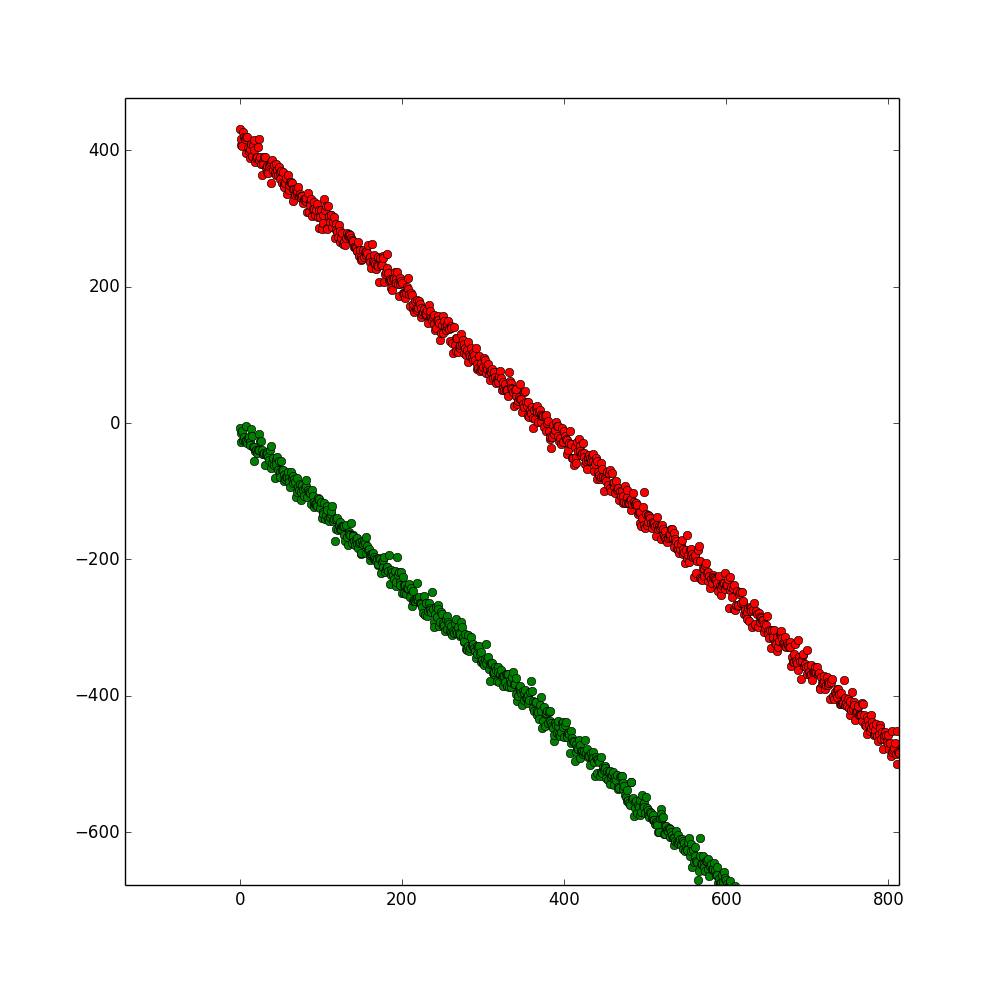

In [1]:
import IPython
IPython.core.display.Image("images/hallway.png", embed=True)

(4, 4)
[ -6.91808354e-04  -3.46918199e-03   2.83547299e-02   9.99591664e-01]
-0.00069180835446


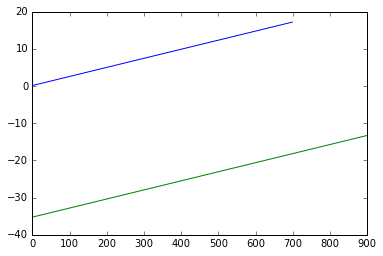

In [39]:
import numpy as np


Your task is to fit a pair lines based on the points generated by the robot's Kinect.

In [1]:
#y = mx

def compute_parallel_lines(first_line, second_line):
   
    import numpy as np
    import numpy.linalg as LA
    %matplotlib inline
   
    #create array of data points.
    p1 = np.array(first_line)
    q1 = np.array(second_line)
   
    #take x-axis and y-axis separately for both data sets.
    p1_x = p1[:,0].reshape(700,1)
    p1_y = p1[:,1].reshape(700,1)
    q1_x = q1[:,0].reshape(900,1)
    q1_y = q1[:,1].reshape(900,1)
   
    #stack y-axis of both the data sets in single matrix.
    p1_q1_y = np.row_stack((p1_y,q1_y))
 
    #create ones and zeros matrix.
    ones_matrix_700 = np.ones(700).reshape(700,1)
    ones_matrix_900 = np.ones(900).reshape(900,1)
    zeros_matrix_700 = np.zeros(700).reshape(700,1)
    zeros_matrix_900 = np.zeros(900).reshape(900,1)
 
    #stack x-axis of both the data sets in one columns.
    p1_q1_x = np.row_stack((p1_x,q1_x))
   
    #stac zeros and ones to construct second column of A matrix.
    p1_q1_second_column = np.row_stack((ones_matrix_700,zeros_matrix_900))
 
    p1_q1_third_column = np.row_stack((zeros_matrix_700,ones_matrix_900))
 
    #construct the A matrix.
    A = np.column_stack((p1_q1_x,p1_q1_second_column,p1_q1_third_column))
   
    #Compute the svd matrix of A.
    U,S,V_t = LA.svd(A)
    print U.shape, V_t.T.shape
    #compute inverse sigma.
    S = np.diag(S**(-1))
    
    #dot product of V, Sigma and U transpose.
    inv = np.dot(V_t.T, np.dot(S, U[:,:3].T))
   
 
    #compte x for slopes and intercepts.
    x = np.dot(inv,p1_q1_y)
   
    #print x
   
    #plot the lines.
    plt.plot(p1_x, x[0]*p1_x+x[1])
    plt.plot(q1_x, x[0]*q1_x+x[2])
   
    plt.scatter(p1_x, x[0]*p1_x+x[1],color = 'blue')
    plt.scatter(q1_x, x[0]*q1_x+x[2],color = 'pink')

In [45]:
# c1+n1*x+n2*y = 0
def compute_parallel_lines(first_line, second_line):
    
    %matplotlib inline
   
    P1= np.array(first_line)
    Q1= np.array(second_line)
   
    Xp =P1[:,0]
    Yp= P1[:,1]
    Xq =Q1[:,0]
    Yq= Q1[:,1]
    Y = np.append(Yp,Yq)
    X = np.append(Xp,Xq)
   
    A1 = np.column_stack((np.ones(len(Xp)),np.zeros(len(Xp)), Xp,Yp))
    A2 = np.column_stack((np.zeros(len(Xq)),np.ones(len(Xq)), Xq,Yq))
    A = np.row_stack((A1,A2))
   
   
    U,S,V_t = LA.svd(A)
    V= V_t.T
     
    c1,c2,n1,n2 = V[:,3]
    print(V[:,3])
    plt.scatter(X,Y)
    plt.plot(Xp,-(n1/n2)*Xp - c1/n2,color="yellow")
    plt.plot(Xq,-(n1/n2)*Xq - c2/n2,color="pink")


(1600, 1600) (3, 3)
(3, 3)


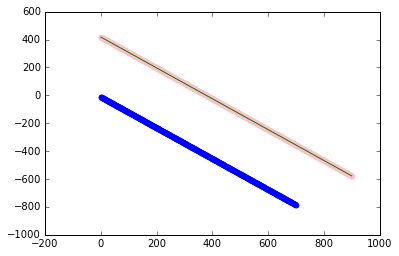

In [6]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
first_line = np.load('./data/P1.npy')
second_line = np.load('./data/Q1.npy')
compute_parallel_lines(first_line, second_line)

### Detecting a corner

At the end of the hallway the robot detects a dramatic change in the point cloud.

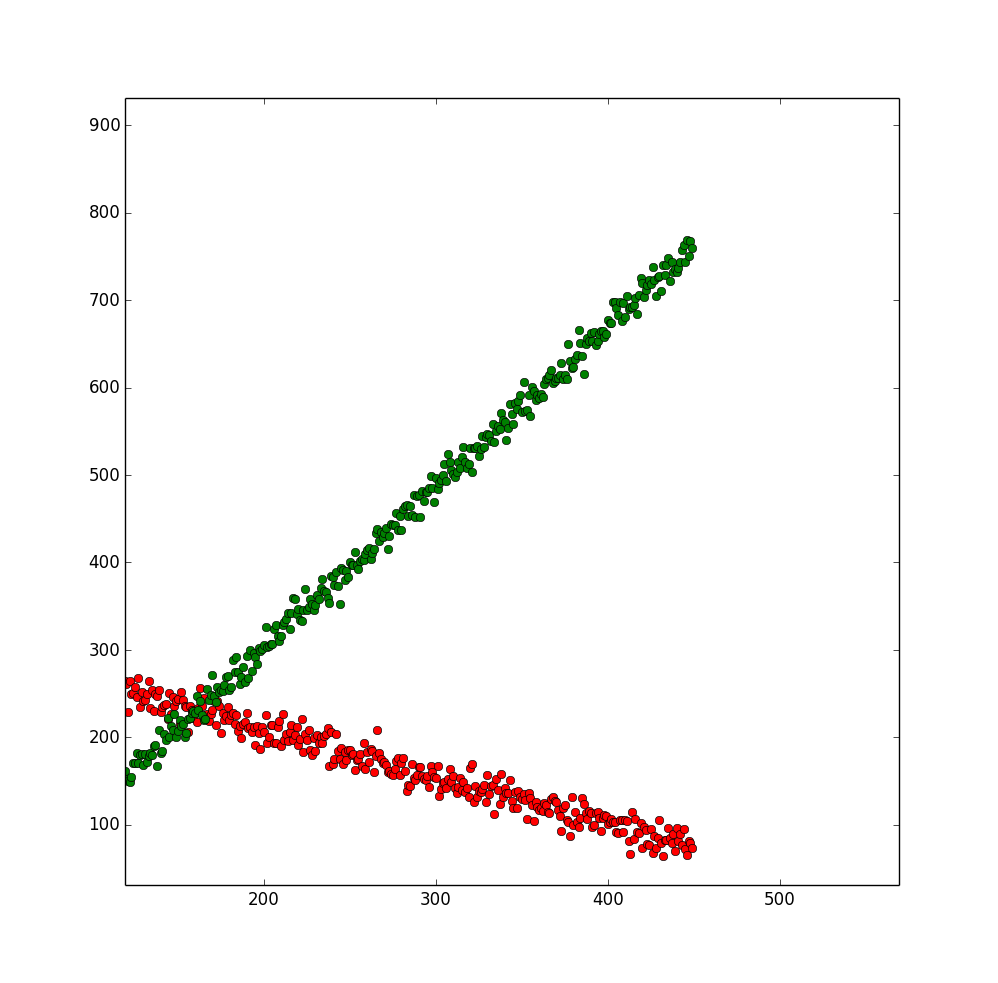

In [14]:
import IPython
IPython.core.display.Image("images/corner.png", embed=True)

Your task is to fit a pair lines based on the points generated by the robot's Kinect.

In [186]:
def compute_perpendicular_lines(first_line, second_line):
    
    %matplotlib inline
   
    P2= np.array(first_line)
    Q2= np.array(second_line)
   
    Xp =P2[:,0]
    Yp= P2[:,1]
    Xq =Q2[:,0]
    Yq= Q2[:,1]
    x_third = np.append(Xp,Yq)
    fourth_col = np.append(Yp,-Xq)
    
    #Y = np.append(Yp,Yq)
    #X = np.append(Xp,Xq)
    #(900*4)
    first_col = np.append(np.ones(len(Xp)),np.zeros(len(Xq)))
    second_col = np.append(np.zeros(len(Xp)),np.ones(len(Xq)))
    
    A = np.column_stack((first_col,second_col,x_third,fourth_col))
    
    print A
    #A2 = np.column_stack((np.zeros(len(Xq)),np.ones(len(Xq)), Xq,Yq))
    #A = np.row_stack((A1,A2))
   
   
    U,S,V_t = LA.svd(A)
    V= V_t.T
    print V.shape
     
    c1,c2,n1,n2 = V[:,3]
    print c1,c2,n1,n2
    #print(V[:,3])
    #plt.scatter(X,Y)
    plt.plot(Xp,-(n1/n2)*Xp - c1/n2,color="yellow")
    plt.plot(Xq,(n2/n1)*Xq - (c2/n1),color="pink")
    
    plt.scatter(Xp,-(n1/n2)*Xp - c1/n2,color="yellow")
    plt.scatter(Xq,(n2/n1)*Xq - (c2/n1),color="pink")

In [2]:
import numpy as np
import numpy.linalg as LA
%matplotlib inline
#load datasets and call the function.
first_line = np.load('./data/P2.npy')
second_line = np.load('./data/Q2.npy')
compute_perpendicular_lines(first_line, second_line)

/home/ramesh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


NameError: name 'compute_perpendicular_lines' is not defined

In [7]:
# y = mx + c
def compute_perpendicular_lines(first_line, second_line):
    import numpy as np
    import numpy.linalg as LA
    %matplotlib inline
    
    #assign each file to respective variables.
    first_line = np.load('./data/P2.npy')
    second_line = np.load('./data/Q2.npy')
    
    #create array of lines.
    p1 = np.array(first_line)
    q1 = np.array(second_line)
    #print p1.shape
    #print q1.shape
    
    #take x-axis of P1 data set.
    p1_x = p1[:,0].reshape(450,1)

    #take y-axis of P1 data set
    p1_y = p1[:,1].reshape(450,1)

    #print p1_y.shape
    
    #take x-axis of Q1 data set.
    q1_x = q1[:,0].reshape(450,1)
    #Multiply minus 1 with q1 as slopes of perpendicular lines are inverse.
    
    q1_x_minus = -(q1_x)

    q1_y = q1[:,1].reshape(450,1)
    
    #Row stack y-axis of both data sets.
    p1_q1_y = np.row_stack((p1_y,q1_y))
    #print p1_q1_y.shape
    
    #create matrix of zeros and ones.
    ones_matrix_450 = np.ones(450).reshape(450,1)
    zeros_matrix_450 = np.zeros(450).reshape(450,1)

    #stack x-axis of both data sets.
    p1_q1_x = np.row_stack((p1_x,q1_x_minus))
    #print p1_q1_x.shape
  
    #stack zeros and ones matrix.
    p1_q1_second_column = np.row_stack((ones_matrix_450,zeros_matrix_450))

    
    p1_q1_third_column = np.row_stack((zeros_matrix_450,ones_matrix_450))
    
    #construct matrix A by column stack of all three columns
    A = np.column_stack((p1_q1_x,p1_q1_second_column,p1_q1_third_column))
    
    #print A
    
    #compute svd of A matrix.
    
    U,S,V_t = LA.svd(A)
    
    #compute sigma inverse.
    S = np.diag(S**(-1))
    
    #stack y co-ordinates from p1 and q1 in single matrix .
    p1_q1_y = np.row_stack((p1_y,q1_y))
    
    #take dot product of V, Sigma and U transpose.
    inv = np.dot(V_t.T, np.dot(S, U[:,:3].T))
    
    #print inv
    #compte x for slopes and intercepts.
    x = np.dot(inv,p1_q1_y)
    
     #plot the lines.
    plt.plot(p1_x, x[0]*p1_x+x[1])
    plt.plot(q1_x, (-1)*x[0]*q1_x+x[2])
   
    plt.scatter(p1_x, x[0]*p1_x+x[1],color = 'blue')
    plt.scatter(q1_x, ((-1)/x[0])*q1_x+x[2],color = 'pink')
    
    #raise NotImplementedError()

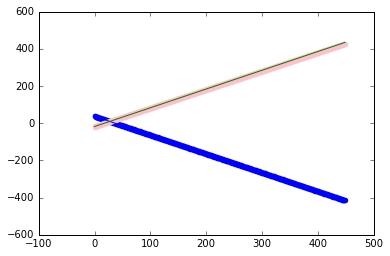

In [8]:
import numpy as np
import numpy.linalg as LA
%matplotlib inline
#load datasets and call the function.
first_line = np.load('./data/P2.npy')
second_line = np.load('./data/Q2.npy')
compute_perpendicular_lines(first_line, second_line)

### Detecting a table

When the robot turns at a table near by the point cloud it receives is the following.

In [ ]:
import IPython
IPython.core.display.Image("images/rectangle.png", embed=True)

In [182]:
# c1+n1x+n2y = 0
def compute_rectangle_lines(first_line, second_line,third_line, fourth_line):
                            
    
    import numpy as np
    import numpy.linalg as LA
    %matplotlib inline
    #assign each file to respective variables.
    p2 = np.array(first_line)
    q2 = np.array(second_line)
    r2 = np.array(third_line)
    s2 = np.array(fourth_line)
    #print p2.shape,q2.shape,r2.shape,s2.shape
    p2x = p2[:,0].reshape(450,1)
    p2y = p2[:,1].reshape(450,1)
    q2x = q2[:,0].reshape(450,1)
    q2y = q2[:,1].reshape(450,1)
    r2x = r2[:,0].reshape(450,1)
    r2y = r2[:,1].reshape(450,1)
    s2x = s2[:,0].reshape(450,1)
    s2y = s2[:,1].reshape(450,1)
    #print p2x.shape
    #print len(p2x)
    #first_col_in = np.row_stack(((np.ones(450,1)),(np.zeros(450,1)),(np.zeros(450,1)),(np.zeros(450,1))))
    first_col = np.row_stack((np.ones((450,1)),np.zeros((450,1)),np.zeros((450,1)),np.zeros((450,1))))
  
    second_col = np.row_stack((np.zeros((450,1)),np.ones((450,1)),np.zeros((450,1)),np.zeros((450,1))))
    third_col = np.row_stack((np.zeros((450,1)),np.zeros((450,1)),np.ones((450,1)),np.zeros((450,1))))
    fouth_col = np.row_stack((np.zeros((450,1)),np.zeros((450,1)),np.zeros((450,1)),np.ones((450,1))))
    fifth_col = np.row_stack((p2x,q2y,r2x,s2y))
    sixth_col = np.row_stack((p2y,-q2x,r2y,-s2x))
    #print first_col.shape,second_col.shape,third_col.shape,fouth_col.shape,fifth_col.shape,sixth_col.shape
    #print first_col_in.shape,second_col.shape,third_col.shape,fouth_col.shape
    A = np.column_stack((first_col,second_col,third_col,fouth_col,fifth_col,sixth_col))
    
    
    print A.shape
    U,S,V = LA.svd(A)
    V = V.T
    print V.shape
    c1,c2,c3,c4,n1,n2 = V[:,5]
    

    #Scatter plot
    plt.scatter(p2x,-(c1/n2)-(n1/n2)*p2x,color = 'pink')
    plt.scatter(q2x, -(c2/n1)+(n2/n1)*q2x,color = 'red')
    plt.scatter(r2x,-(c3/n2)-(n1/n2)*r2x,color = 'blue')
    plt.scatter(s2x, -(c4/n1)+(n2/n1)*s2x,color = 'green')



(1800, 6)
(6, 6)


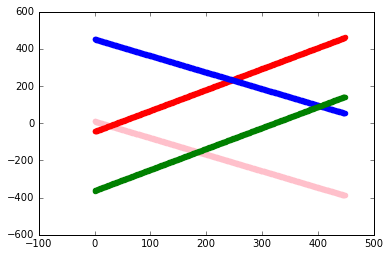

In [183]:
import numpy as np
import numpy.linalg as LA
%matplotlib inline
first_line = np.load('./data/P2.npy')
second_line = np.load('./data/Q2.npy')
third_line = np.load('./data/R2.npy')
fourth_line = np.load('./data/S2.npy')
compute_rectangle_lines(first_line, second_line, third_line, fourth_line)

In [11]:
# y = mx + c
def compute_rectangle_lines(first_line, second_line,third_line, fourth_line):
                            
    
    import numpy as np
    import numpy.linalg as LA
    %matplotlib inline
    #assign each file to respective variables.
    p2 = np.load('./data/P2.npy')
    q2 = np.load('./data/Q2.npy')
    r2 = np.load('./data/R2.npy')
    s2 = np.load('./data/S2.npy')
    
    #Take coloumn of x and y individually, and store in particular variables.
    
    p2_x = p2[:,0].reshape(450,1)
    p2_y = p2[:,1].reshape(450,1)
    
    #Take coloumn of x and y individually, and store in particular variables.
    
    q2_x = q2[:,0].reshape(450,1)
    q2_y = q2[:,1].reshape(450,1)
    
     #Take coloumn of x and y individually, and store in particular variables
        
    r2_x = r2[:,0].reshape(450,1)
    r2_y = r2[:,1].reshape(450,1)
    
     #Take coloumn of x and y individually, and store in particular variables
        
    s2_x = s2[:,0].reshape(450,1)
    s2_y = s2[:,1].reshape(450,1)
    
    #Stack y-axis of all data sets in single matrix. i.e. y.
    y = np.row_stack((p2_y,q2_y,r2_y,s2_y))
    
    # Create ones and zeros of 450 * 1.
    ones_matrix_450 = np.ones(450).reshape(450,1)
    zeros_matrix_450 = np.zeros(450).reshape(450,1)

    # Stack all columns to make A matrix.
    # As we need 1800*5 matrix to get values of all data sets.
    
    #stack all data sets in single columns, as p2 and q2 are perpendicular
    #so (-1) multipled, same for r2 and s2
    x_first_column = np.row_stack((p2_x,(-1)*q2_y,r2_x,(-1)*s2_x))
    print x_first_column.shape
    x_second_column = np.row_stack((ones_matrix_450,+\
                                    zeros_matrix_450,zeros_matrix_450,+\
                                    zeros_matrix_450))
    x_third_column = np.row_stack((zeros_matrix_450,+\
                                   ones_matrix_450,zeros_matrix_450,+\
                                   zeros_matrix_450))
    x_fourth_column = np.row_stack((zeros_matrix_450,+\
                                    zeros_matrix_450,ones_matrix_450,+\
                                    zeros_matrix_450))
    x_fifth_column = np.row_stack((zeros_matrix_450,+\
                                   zeros_matrix_450,zeros_matrix_450,+\
                                   ones_matrix_450))
   

    # stack all columns to construct A matrix.
    A = np.column_stack((x_first_column,x_second_column,+\
                         x_third_column,x_fourth_column,+\
                         x_fifth_column))
    
    #compute SVD for A matrix.
    U,S,V_t = LA.svd(A)
    print U
    #compute sigma inverse.
    S = np.diag(S**(-1))

    #take dot product of V, Sigma and U transpose.
    inv = np.dot(V_t.T, np.dot(S, U[:,:5].T))
    
    #compte x for slopes and intercepts.
    x = np.dot(inv,y)
    print x
  
    #plot all lines.
    plt.plot(p2_x, x[0]*p2_x+x[1])
    plt.plot(q2_x, (-1)*x[0]*q2_x+x[2])
    plt.plot(r2_x, x[0]*r2_x+x[3])
    plt.plot(s2_x, (-1)*x[0]*s2_x+x[4])
    
    #Scatter plot
    plt.scatter(p2_x, x[0]*p2_x+x[1],color = 'pink')
    plt.scatter(q2_x, (-1)*x[0]*q2_x+x[2],color = 'pink')
    plt.scatter(r2_x, x[0]*r2_x+x[3],color = 'pink')
    plt.scatter(s2_x, (-1)*x[0]*s2_x+x[4],color = 'pink')


    #raise NotImplementedError()

(1800, 1)
[[ -7.68783844e-08  -3.81312201e-02  -9.81316736e-03 ...,   3.93574155e-02
    3.94424994e-02   3.95275833e-02]
 [ -9.13740921e-05  -3.81312201e-02  -9.81316736e-03 ...,  -2.00734598e-02
   -2.01148712e-02  -2.01562827e-02]
 [ -1.82671306e-04  -3.81312201e-02  -9.81316736e-03 ...,  -2.39178027e-02
   -2.39728999e-02  -2.40279972e-02]
 ..., 
 [  4.08099314e-02  -1.95830011e-02   3.22874910e-02 ...,   9.96281955e-01
   -3.72465054e-03  -3.73125589e-03]
 [  4.09012286e-02  -1.95830011e-02   3.22874910e-02 ...,  -3.72476799e-03
    9.96268597e-01  -3.73803807e-03]
 [  4.09925258e-02  -1.95830011e-02   3.22874910e-02 ...,  -3.73149079e-03
   -3.73815551e-03   9.96255180e-01]]
[[  -0.97743643]
 [  30.36188217]
 [   4.69884397]
 [ 471.97352457]
 [-328.73509759]]


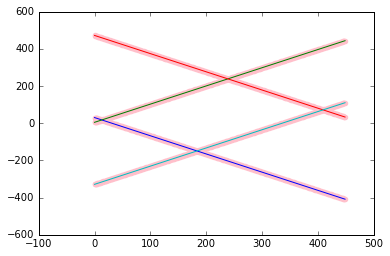

In [12]:
# Load the four set of data points, for each line,
#and calls the function.
import numpy as np
import numpy.linalg as LA
%matplotlib inline
first_line = np.load('./data/P2.npy')
second_line = np.load('./data/Q2.npy')
third_line = np.load('./data/R2.npy')
fourth_line = np.load('./data/S2.npy')
compute_rectangle_lines(first_line, second_line, third_line, fourth_line)

In [149]:
a = np.ones((450,1))
